<a href="https://colab.research.google.com/github/rakshini2003/rock-vs-mine-prediction-using-ml/blob/main/loan_status_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import the dependencies

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [ ]:
loan_dataset=pd.read_csv('/content/loan_data_1.csv')

In [ ]:
loan_dataset.head()

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N
1,1,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
2,2,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
3,3,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y
4,4,LP001013,Male,Yes,0,Not Graduate,No,2333.0,1516.0,95.0,360.0,1.0,Urban,Y


In [ ]:
loan_dataset.shape

(381, 14)

In [ ]:
loan_dataset.describe()

,Unnamed: 0,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,381.000000,369.000000,363.000000,373.000000,370.000000,351.000000
mean,190.000000,3563.422764,1267.005289,104.914209,340.864865,0.837607
std,110.129469,1427.371257,2388.048316,28.484822,68.549257,0.369338
min,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000
25%,95.000000,2583.000000,0.000000,90.000000,360.000000,1.000000
50%,190.000000,3326.000000,830.000000,110.000000,360.000000,1.000000
75%,285.000000,4226.000000,2008.000000,127.000000,360.000000,1.000000
max,380.000000,9703.000000,33837.000000,150.000000,480.000000,1.000000


In [ ]:
loan_dataset.isnull().sum()

Unnamed: 0            0
Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             6
Self_Employed        21
ApplicantIncome      12
CoapplicantIncome    18
LoanAmount            8
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
loan_dataset=loan_dataset.dropna()

In [ ]:
loan_dataset.isnull().sum()

Unnamed: 0           0
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
loan_dataset.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)

In [ ]:
loan_dataset.head()

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,0
1,1,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,1
2,2,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,1
3,3,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,1
4,4,LP001013,Male,Yes,0,Not Graduate,No,2333.0,1516.0,95.0,360.0,1.0,Urban,1


In [ ]:
loan_dataset['Dependents'].value_counts()

Dependents
0     173
2      41
1      38
3+     20
Name: count, dtype: int64

In [ ]:
loan_dataset=loan_dataset.replace(to_replace='3+',value=4)

In [ ]:
loan_dataset.head()

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,0
1,1,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,1
2,2,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,1
3,3,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,1
4,4,LP001013,Male,Yes,0,Not Graduate,No,2333.0,1516.0,95.0,360.0,1.0,Urban,1


In [ ]:
loan_dataset.tail()

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
373,373,LP002936,Male,Yes,0,Graduate,No,3859.0,3300.0,142.0,180.0,1.0,Rural,1
374,374,LP002940,Male,No,0,Not Graduate,No,3833.0,0.0,110.0,360.0,1.0,Rural,1
376,376,LP002953,Male,Yes,4,Graduate,No,5703.0,0.0,128.0,360.0,1.0,Urban,1
378,378,LP002978,Female,No,0,Graduate,No,2900.0,0.0,71.0,360.0,1.0,Rural,1
379,379,LP002979,Male,Yes,4,Graduate,No,4106.0,0.0,40.0,180.0,1.0,Rural,1


In [ ]:
loan_dataset['Dependents'].value_counts()

Dependents
0    173
2     41
1     38
4     20
Name: count, dtype: int64

data visualization

<Axes: xlabel='Education', ylabel='count'>

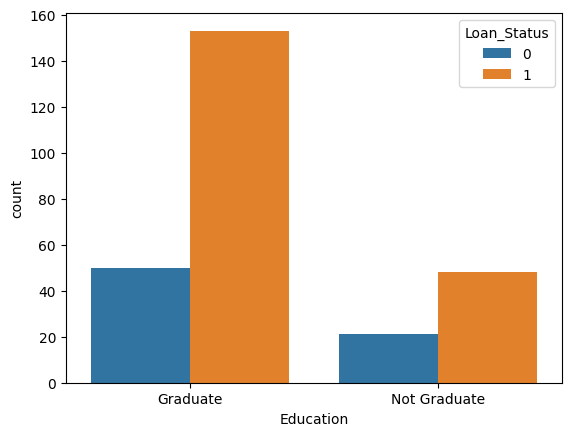

In [ ]:
sns.countplot(x='Education',hue='Loan_Status',data=loan_dataset)

<Axes: xlabel='Married', ylabel='count'>

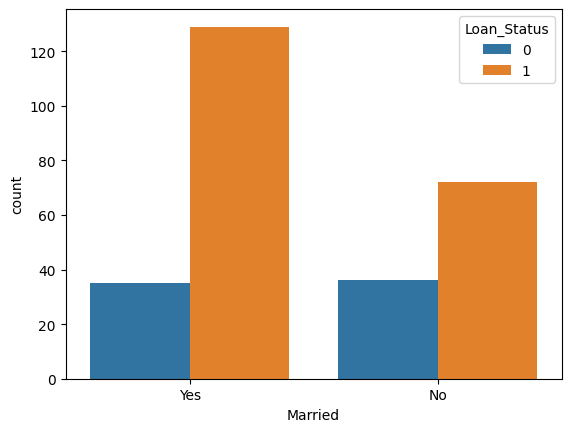

In [ ]:
sns.countplot(x='Married',hue='Loan_Status',data=loan_dataset)

In [ ]:
loan_dataset.replace(
    {
        'Married': {'No': 0, 'Yes': 1},
        'Gender': {'Female': 0, 'Male': 1},
        'Self_Employed': {'No': 0, 'Yes': 1},
        'Property_Area': {'Rural': 0, 'Semiurban': 1, 'Urban': 2},
        'Education': {'Graduate': 1, 'Not Graduate': 0}
    },
    inplace=True
)

In [ ]:
loan_dataset.head()

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,LP001003,1,1,1,1,0,4583.0,1508.0,128.0,360.0,1.0,0,0
1,1,LP001005,1,1,0,1,1,3000.0,0.0,66.0,360.0,1.0,2,1
2,2,LP001006,1,1,0,0,0,2583.0,2358.0,120.0,360.0,1.0,2,1
3,3,LP001008,1,0,0,1,0,6000.0,0.0,141.0,360.0,1.0,2,1
4,4,LP001013,1,1,0,0,0,2333.0,1516.0,95.0,360.0,1.0,2,1


In [ ]:
X=loan_dataset.drop(columns=['Loan_ID','Loan_Status'],axis=1)
Y=loan_dataset['Loan_Status']

In [ ]:
print(X)
print(Y)

     Unnamed: 0  Gender  Married Dependents  Education  Self_Employed  \
0             0       1        1          1          1              0   
1             1       1        1          0          1              1   
2             2       1        1          0          0              0   
3             3       1        0          0          1              0   
4             4       1        1          0          0              0   
..          ...     ...      ...        ...        ...            ...   
373         373       1        1          0          1              0   
374         374       1        0          0          0              0   
376         376       1        1          4          1              0   
378         378       0        0          0          1              0   
379         379       1        1          4          1              0   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             4583.0             1508.0       128.

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1,stratify=Y, random_state=2)


In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(272, 12) (244, 12) (28, 12)


In [ ]:
classifier=svm.SVC(kernel='linear')

In [ ]:
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

In [ ]:
X_train_prediction=classifier.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction,Y_train)

In [ ]:
print('Accuracy on training data',training_data_accuracy)

Accuracy on training data 0.8278688524590164
